In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 63.9 MB/s eta 0:00:00


In [3]:

import gensim.downloader as api   # for loading pre-trained word embeddings
import numpy as np                # for handling matrices and numerical operations
import pandas as pd               # for organizing data if needed
import matplotlib.pyplot as plt   # for visualization (scatter plots)
from sklearn.manifold import TSNE # for dimensionality reduction (t-SNE)

# Explanation:
# gensim: provides pre-trained embeddings like Word2Vec, GloVe
# numpy/pandas: handle vectors and tabular data
# matplotlib: create scatter plots
# sklearn.manifold.TSNE: reduce high-dimensional vectors to 2D for visualization


In [5]:
# STEP 3 — Load Embedding Model
model = api.load("glove-wiki-gigaword-100")  # load pre-trained GloVe embeddings (100 dimensions)

# Print vocabulary size
print("Vocabulary size:", len(model.key_to_index))

# Display one example vector
word = "computer"
print(f"Vector for '{word}':\n", model[word])

# Explanation:
# Word embeddings are numerical representations of word meanings.
# Each word is mapped to a vector in high-dimensional space.


[==================================================] 100.0% 128.1/128.1MB downloaded
Vocabulary size: 400000
Vector for 'computer':
 [-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526e-01  7.

In [6]:
# Choose meaningful words from categories (animals, cities, devices, emotions, etc.)
words = [
    "dog", "cat", "lion", "tiger", "elephant", "horse",
    "paris", "london", "berlin", "tokyo", "delhi", "newyork",
    "computer", "laptop", "phone", "tablet", "keyboard", "internet",
    "happy", "sad", "angry", "joy", "love", "fear",
    "car", "bus", "train", "bicycle", "airplane", "ship",
    "apple", "banana", "orange", "grape", "mango", "strawberry",
    "music", "dance", "art", "science", "math", "history"
]

# Extract corresponding vectors
vectors = np.array([model[w] for w in words])

print("Selected words:", len(words))
print("Vector shape:", vectors.shape)

# Explanation:
# We grouped words into categories (animals, cities, devices, emotions, transport, fruits, academics).
# This helps us see semantic clusters in visualization.


Selected words: 42
Vector shape: (42, 100)


In [7]:

tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=1000)
word_embeddings_2d = tsne.fit_transform(vectors)

print("t-SNE output shape:", word_embeddings_2d.shape)

# Explanation:
# t-SNE reduces vectors from 100 dimensions → 2 dimensions.
# It keeps nearby points close and separates distant ones.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE output shape: (42, 2)


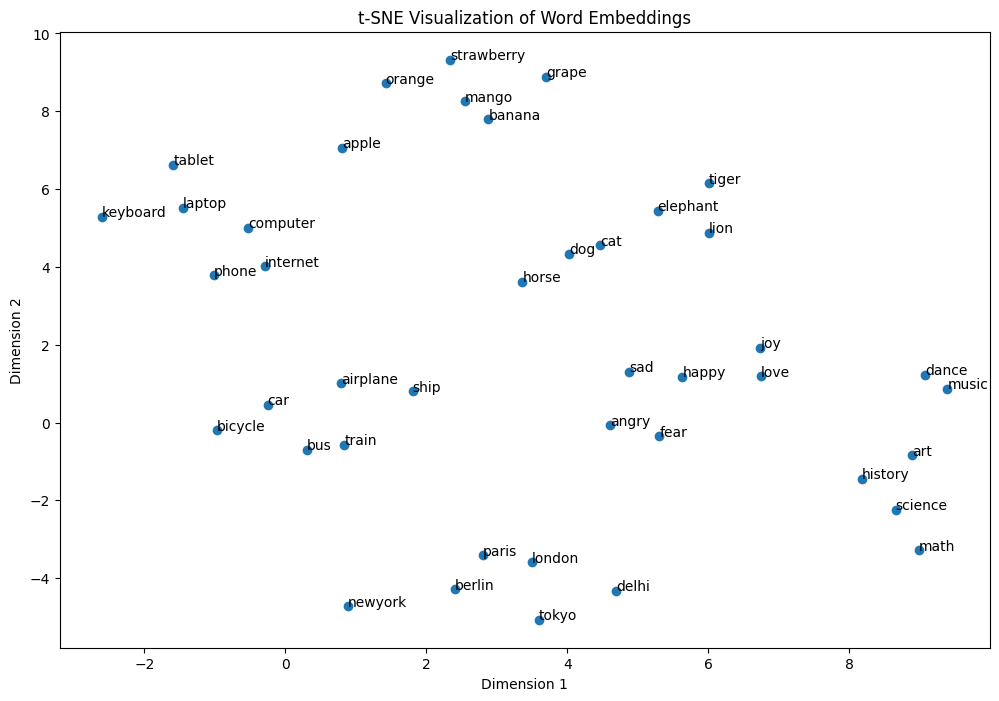

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])

# Annotate each point with word label
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

# Optional: You can color categories separately if desired.


In [9]:
import gensim.downloader as api

# Load pre-trained Word2Vec embeddings (Google News dataset, 300 dimensions)
model = api.load("word2vec-google-news-300")

# Print vocabulary size
print("Vocabulary size:", len(model.key_to_index))

# Display one example vector
word = "computer"
print(f"Vector for '{word}':\n", model[word])

# Explanation:
# Word2Vec embeddings are trained using neural networks on large text corpora.
# Each word is represented as a 300-dimensional vector capturing semantic meaning.


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary size: 3000000
Vector for 'computer':
 [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1

In [10]:
# Choose meaningful words from categories
words = [
    "dog", "cat", "lion", "tiger", "elephant", "horse",
    "paris", "london", "berlin", "tokyo", "delhi", "newyork",
    "computer", "laptop", "phone", "tablet", "keyboard", "internet",
    "happy", "sad", "angry", "joy", "love", "fear",
    "car", "bus", "train", "bicycle", "airplane", "ship",
    "apple", "banana", "orange", "grape", "mango", "strawberry",
    "music", "dance", "art", "science", "math", "history"
]

# Extract vectors
vectors = np.array([model[w] for w in words])

print("Selected words:", len(words))
print("Vector shape:", vectors.shape)

# Explanation:
# Words grouped by categories (animals, cities, devices, emotions, transport, fruits, academics).
# Helps visualize semantic clusters.


Selected words: 42
Vector shape: (42, 300)


In [11]:
tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=1000)
word_embeddings_2d = tsne.fit_transform(vectors)

print("t-SNE output shape:", word_embeddings_2d.shape)

# Explanation:
# t-SNE reduces 300D Word2Vec vectors → 2D.
# Preserves local neighborhoods, separates distant points.


t-SNE output shape: (42, 2)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


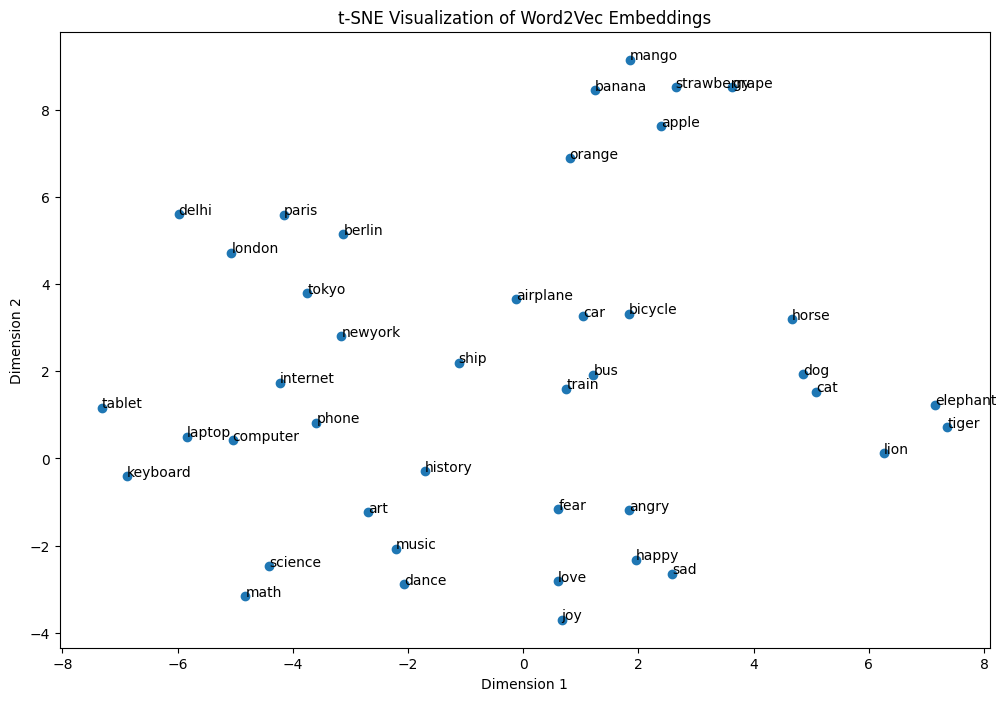

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1])

# Annotate each point
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
